In [2]:
import librosa
from cqcc import cqcc
import matplotlib.pyplot as plt 

In [3]:
filename = "assets/F1_1.wav"

In [4]:
# INPUT SIGNAL
x,fs = librosa.load(filename, sr = 16000); # from ASVspoof2015 database
x = x.reshape(x.shape[0], 1)  # for one-channel signal 

print(x.shape)

(46175, 1)


In [5]:
# fs: 16000
# x: (64244,)

# PARAMETERS
B = 96
fmax = fs/2
fmin = fmax/2**9
d = 16
cf = 19
ZsdD = 'ZsdD'

In [6]:
# COMPUTE CQCC FEATURES
CQcc, LogP_absCQT, TimeVec, FreqVec, Ures_LogP_absCQT, Ures_FreqVec, absCQT = cqcc(x, fs, B, fmax, fmin, d, cf, ZsdD)
print("cqcc_feat:", CQcc.shape)       # number of frames * number of cep
print(CQcc)
print("cqcc_lpms:", LogP_absCQT.shape) 

cqcc_feat: (338, 60)
[[-3.48957689e+02 -3.72456360e+02 -3.89788629e+02 ... -6.90654003e-01
  -7.02758944e-01 -7.16816652e-01]
 [-9.33813307e+00 -9.94710716e+00 -1.03841699e+01 ... -1.59935606e+00
  -1.62732856e+00 -1.65972728e+00]
 [-1.34755391e+01 -1.43403453e+01 -1.49762556e+01 ... -2.14058936e+00
  -2.17794995e+00 -2.22104735e+00]
 ...
 [ 4.45032860e-04  2.59750905e-04  4.20931303e-05 ...  3.12017591e-06
   2.39851277e-06  1.40530764e-06]
 [-1.43533207e-04 -2.80367791e-05  9.32962712e-05 ...  1.76232572e-06
   1.24245025e-06  5.76675478e-07]
 [ 1.74231728e-04  1.12815138e-04  3.79485040e-05 ...  3.83958272e-06
   3.25323495e-06  2.31296173e-06]]
cqcc_lpms: (338, 863)


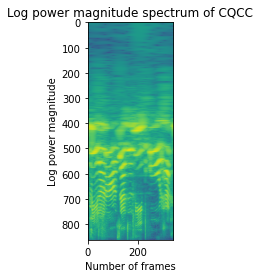

In [7]:
#### visulization spectrum #####
plt.figure()
plt.title('Log power magnitude spectrum of CQCC')
plt.ylabel('Log power magnitude')
plt.xlabel('Number of frames')
plt.imshow(LogP_absCQT.T)

In [8]:
# COMPUTE MFCC FEATURES
from python_speech_features import mfcc
from python_speech_features import logfbank
import scipy.io.wavfile as wav

In [9]:
(rate,sig) = wav.read(filename)
mfcc_feat = mfcc(sig,rate)      # number of frames * number of cep
fbank_feat = logfbank(sig,rate)
print("mfcc_feat:", mfcc_feat.shape)
print("mfcc_lgms:", fbank_feat.shape)

mfcc_feat: (288, 13)
mfcc_lgms: (288, 26)


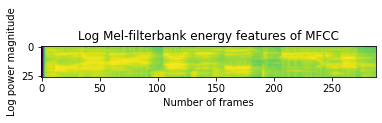

In [10]:
plt.figure()
plt.title('Log Mel-filterbank energy features of MFCC')
plt.ylabel('Log power magnitude')
plt.xlabel('Number of frames')
plt.imshow(fbank_feat.T)
plt.show()